# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             #mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             #mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             #) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [14]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [15]:
len(results.pose_landmarks.landmark)

33

In [16]:
frame

array([[[ 53,  74,  93],
        [ 56,  76,  96],
        [ 58,  77,  97],
        ...,
        [155, 168, 182],
        [154, 167, 180],
        [154, 167, 180]],

       [[ 55,  75,  94],
        [ 55,  75,  94],
        [ 59,  77,  97],
        ...,
        [153, 167, 181],
        [153, 167, 181],
        [153, 167, 181]],

       [[ 55,  74,  93],
        [ 56,  75,  94],
        [ 57,  76,  96],
        ...,
        [154, 168, 182],
        [153, 168, 183],
        [153, 168, 183]],

       ...,

       [[143, 153, 158],
        [142, 152, 157],
        [139, 148, 153],
        ...,
        [145, 161, 168],
        [150, 165, 173],
        [152, 167, 176]],

       [[143, 153, 158],
        [142, 152, 157],
        [139, 148, 153],
        ...,
        [145, 161, 168],
        [149, 164, 172],
        [151, 166, 175]],

       [[144, 154, 159],
        [142, 152, 157],
        [137, 147, 152],
        ...,
        [145, 161, 168],
        [148, 163, 171],
        [151, 166, 175]]

In [17]:
draw_landmarks(frame, results)

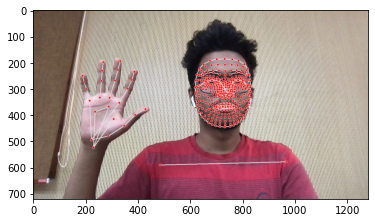

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
len(pose)

33

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
len(face)

1404

In [24]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [25]:
face

array([ 0.57504845,  0.4934344 , -0.02700338, ...,  0.62845862,
        0.37491757,  0.02160096])

In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [27]:
rh

array([ 1.74839258e-01,  6.86824858e-01, -6.00231688e-05,  2.24886477e-01,
        6.67815864e-01, -2.46896651e-02,  2.72595167e-01,  6.12783074e-01,
       -3.37532721e-02,  3.05283666e-01,  5.54693580e-01, -4.63206135e-02,
        3.35690111e-01,  5.24378657e-01, -6.22360483e-02,  2.57564783e-01,
        4.90669370e-01,  9.45201202e-04,  2.83031613e-01,  4.15966928e-01,
       -1.13442698e-02,  2.94738054e-01,  3.69763523e-01, -1.90209020e-02,
        3.02849293e-01,  3.26961875e-01, -2.41793003e-02,  2.28753686e-01,
        4.64987993e-01,  2.92377044e-05,  2.45198488e-01,  3.72684211e-01,
       -6.27293158e-03,  2.53858864e-01,  3.17504764e-01, -1.42712947e-02,
        2.60401219e-01,  2.70661533e-01, -1.95717569e-02,  1.99898183e-01,
        4.62759107e-01, -7.44488556e-03,  2.04360843e-01,  3.75284016e-01,
       -1.96124688e-02,  2.06578001e-01,  3.21740091e-01, -3.40418592e-02,
        2.09395215e-01,  2.75540143e-01, -4.42389511e-02,  1.69312596e-01,
        4.79672879e-01, -

In [28]:
face

array([ 0.57504845,  0.4934344 , -0.02700338, ...,  0.62845862,
        0.37491757,  0.02160096])

In [29]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
pose

array([ 5.82351208e-01,  4.43227291e-01, -6.75190091e-01,  9.99944031e-01,
        5.98858595e-01,  3.71297926e-01, -6.11558378e-01,  9.99887466e-01,
        6.12095535e-01,  3.72879654e-01, -6.11384809e-01,  9.99843597e-01,
        6.26473069e-01,  3.74814510e-01, -6.11439228e-01,  9.99858618e-01,
        5.54091811e-01,  3.70205045e-01, -6.11699224e-01,  9.99919355e-01,
        5.34217238e-01,  3.72532785e-01, -6.11114085e-01,  9.99920726e-01,
        5.16329050e-01,  3.76465350e-01, -6.11355841e-01,  9.99949813e-01,
        6.40509784e-01,  4.02407289e-01, -2.59204566e-01,  9.99782860e-01,
        4.91629362e-01,  4.09619182e-01, -2.50514001e-01,  9.99943554e-01,
        6.05914295e-01,  5.17520845e-01, -5.53059340e-01,  9.99900281e-01,
        5.49157858e-01,  5.25094867e-01, -5.50827742e-01,  9.99933004e-01,
        7.56336033e-01,  8.03496659e-01, -8.89948681e-02,  9.98229146e-01,
        3.79568726e-01,  8.20385516e-01, -1.87236369e-01,  9.99724805e-01,
        8.47364604e-01,  

In [31]:
result_test = extract_keypoints(results)

In [32]:
result_test

array([ 0.58235121,  0.44322729, -0.67519009, ...,  0.14799315,
        0.3476522 , -0.05242726])

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')

array([ 0.58235121,  0.44322729, -0.67519009, ...,  0.14799315,
        0.3476522 , -0.05242726])

# 4. Setup Folders for Collection

In [53]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [54]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [55]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [56]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [58]:
label_map = {label:num for num, label in enumerate(actions)}

In [59]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
# 90 videos, 30 frames each, 1662 keypoints
np.array(sequences).shape

(90, 30, 1662)

In [63]:
np.array(labels).shape

(90,)

In [64]:
X = np.array(sequences)

In [65]:
X.shape

(90, 30, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [68]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [83]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [84]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [85]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [73]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 205ms/step - loss: 1.3643 - categorical_accuracy: 0.2818
Epoch 2/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.6378 - categorical_accuracy: 0.3562
Epoch 3/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1255 - categorical_accuracy: 0.2857
Epoch 4/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1373 - categorical_accuracy: 0.3620
Epoch 5/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0915 - categorical_accuracy: 0.3757
Epoch 6/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0695 - categorical_accuracy: 0.4208
Epoch 7/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0494 - categorical_accuracy: 0.3464
Epoch 8/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0572 - categorical_accuracy: 0.4129
Epoch 9/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0404 - categorical_accuracy: 0.4932


3/3 [==============================] - 0s 60ms/step - loss: 0.4249 - categorical_accuracy: 0.8455
Epoch 75/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3603 - categorical_accuracy: 0.9276
Epoch 76/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4097 - categorical_accuracy: 0.8455
Epoch 77/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3559 - categorical_accuracy: 0.8884
Epoch 78/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2970 - categorical_accuracy: 0.9041
Epoch 79/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2991 - categorical_accuracy: 0.9882
Epoch 80/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2613 - categorical_accuracy: 0.9256
Epoch 81/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2623 - categorical_accuracy: 0.8962
Epoch 82/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4723 - categorical_accuracy: 0.7319
Epoch 

3/3 [==============================] - 0s 59ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 0s 54ms/step - loss: 9.8559e-04 - categorical_accuracy: 1.0000
Epoch 154/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0014 - categorical_accuracy: 1

3/3 [==============================] - 0s 55ms/step - loss: 1.0944e-04 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.7377e-05 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0974e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.7759e-05 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 56ms/step - loss: 9.7085e-05 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.0130e-05 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.2774e-05 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.8512e-05 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 57ms/step - loss: 6.24

3/3 [==============================] - 0s 61ms/step - loss: 2.0696e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.6508e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.2416e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.1018e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.5406e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.4927e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.1121e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.1646e-05 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.02

3/3 [==============================] - 0s 58ms/step - loss: 8.1323e-06 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 60ms/step - loss: 9.5492e-06 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2370e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1012e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0101e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1995e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 57ms/step - loss: 9.4068e-06 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0813e-05 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.16

3/3 [==============================] - 0s 61ms/step - loss: 5.5266e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.8923e-06 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 59ms/step - loss: 5.5651e-06 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 63ms/step - loss: 5.3643e-06 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.7896e-06 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.5439e-06 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.4602e-06 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.4417e-06 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 59ms/step - loss: 5.36

KeyboardInterrupt: 

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [75]:
res = model.predict(X_test)

In [76]:
res

array([[9.9999928e-01, 2.8266936e-11, 7.4413055e-07],
       [9.9999976e-01, 7.1130114e-14, 1.8744673e-07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.1352019e-13, 5.9573839e-08],
       [3.2552929e-08, 4.4802512e-08, 9.9999988e-01]], dtype=float32)

In [77]:
actions[np.argmax(res[4])]

'iloveyou'

In [78]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [79]:
model.save('action.h5')

In [80]:
#del model

In [86]:
#model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [87]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [88]:
yhat = model.predict(X_test)

In [89]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [90]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]])

In [91]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [92]:
from scipy import stats

In [99]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

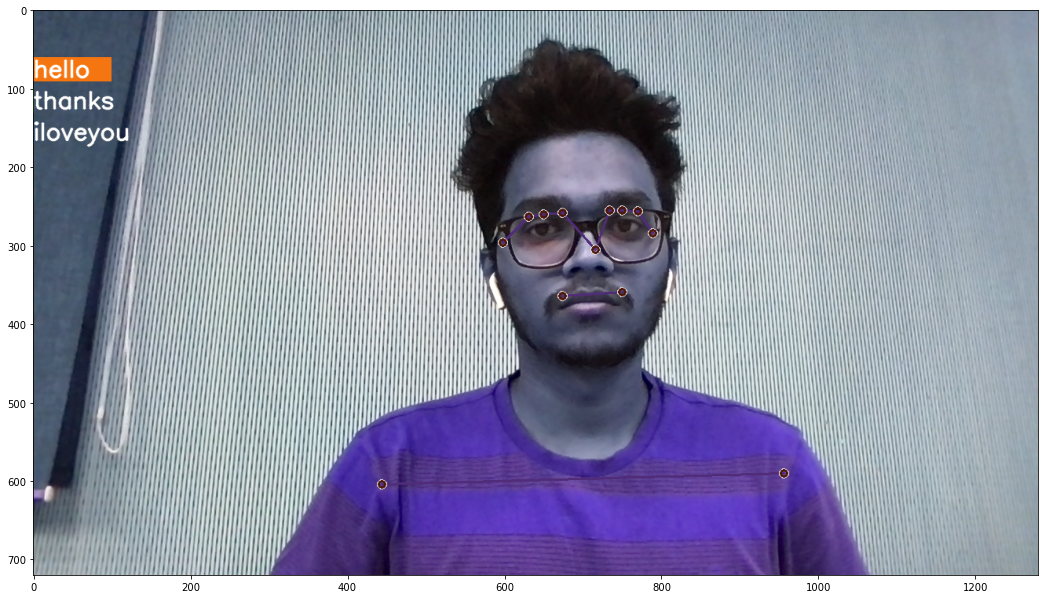

In [100]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [103]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [104]:
cap.release()
cv2.destroyAllWindows()